In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
np.random.seed(42) # Ensuring reproducibility
data = np.random.rand(100)

In [3]:
labels = np.array(["Class1" if x <= 0.5 else "Class2" for x in data[:50]])

In [4]:
def euclidean_distance(x1, x2):
    return abs(x1 - x2)

In [5]:
def knn(train_data, train_labels, test_point, k):
    distances = np.abs(train_data - test_point)
    nearest_indices = np.argsort(distances)[:k] # Get k nearest points
    k_nearest_labels = train_labels[nearest_indices] # Get labels of k nearest points
    return Counter(k_nearest_labels).most_common(1)[0][0]

In [6]:
train_data, train_labels, test_data = data[:50], labels, data[50:]
k_values = [1, 2, 3, 4, 5, 20, 30]
results = {k: np.array([knn(train_data, train_labels, x, k) for x in test_data]) for k in k_values}

In [7]:
for k in k_values:
    print(f"\nResults for k = {k}:")
    for i, label in enumerate(results[k], start=51):
        print(f"Point x{i} (value: {test_data[i - 51]:.4f}) is classified as {label}")


Results for k = 1:
Point x51 (value: 0.9696) is classified as Class2
Point x52 (value: 0.7751) is classified as Class2
Point x53 (value: 0.9395) is classified as Class2
Point x54 (value: 0.8948) is classified as Class2
Point x55 (value: 0.5979) is classified as Class2
Point x56 (value: 0.9219) is classified as Class2
Point x57 (value: 0.0885) is classified as Class1
Point x58 (value: 0.1960) is classified as Class1
Point x59 (value: 0.0452) is classified as Class1
Point x60 (value: 0.3253) is classified as Class1
Point x61 (value: 0.3887) is classified as Class1
Point x62 (value: 0.2713) is classified as Class1
Point x63 (value: 0.8287) is classified as Class2
Point x64 (value: 0.3568) is classified as Class1
Point x65 (value: 0.2809) is classified as Class1
Point x66 (value: 0.5427) is classified as Class2
Point x67 (value: 0.1409) is classified as Class1
Point x68 (value: 0.8022) is classified as Class2
Point x69 (value: 0.0746) is classified as Class1
Point x70 (value: 0.9869) is c

In [8]:
for k in k_values:
    class1 = test_data[results[k] == "Class1"]
    class2 = test_data[results[k] == "Class2"]

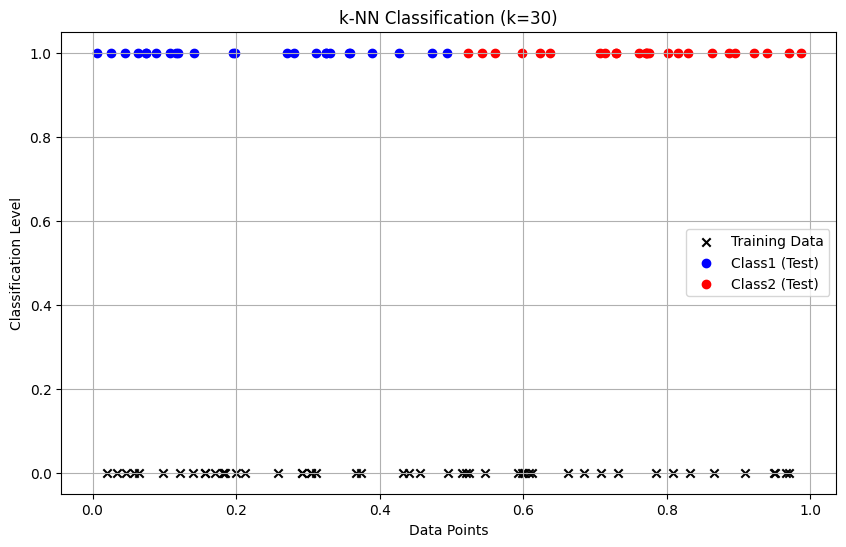

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data, [0] * len(train_data), c="black", label="Training Data", marker="x")
plt.scatter(class1, [1] * len(class1), c="blue", label="Class1 (Test)", marker="o")
plt.scatter(class2, [1] * len(class2), c="red", label="Class2 (Test)", marker="o")
plt.title(f"k-NN Classification (k={k})")
plt.xlabel("Data Points")
plt.ylabel("Classification Level")
plt.legend()
plt.grid(True)
plt.show()